In [1]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

In [2]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [3]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

# Data Collection for China Stocks

In [4]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-365)

In [5]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


In [6]:
china_df = china_ticker_df.rename(columns={'CQQQ':'CQQQ (Technology)', 'CHIE':'CHIE (Energy)', 'CHIM':'CHIM (Materials)', 'KURE':'KURE (Healthcare)', 'CHIS':'CHIS (Consumer Staples)'})
china_df.head()

,ASHR,CQQQ (Technology),CHIE (Energy),CHIM (Materials),KURE (Healthcare),CHIS (Consumer Staples)
date,,,,,,
2019-02-06 00:00:00+00:00,24.17,45.23,11.625,15.980,19.2012,16.2400
2019-02-07 00:00:00+00:00,23.95,44.08,11.460,15.811,19.0900,16.1470
2019-02-08 00:00:00+00:00,23.81,44.66,11.390,15.950,18.8522,16.0625
2019-02-11 00:00:00+00:00,24.45,45.21,11.495,16.005,19.3500,16.3634
2019-02-12 00:00:00+00:00,24.66,45.90,11.490,15.990,19.8750,16.4648


In [7]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

#china_df.dropna(inplace=True)
#china_df.isnull().sum()

ASHR                       0
CQQQ (Technology)          0
CHIE (Energy)              0
CHIM (Materials)           0
KURE (Healthcare)          0
CHIS (Consumer Staples)    0
dtype: int64

# Monte Carlo Simulation

In [8]:
# Calculate the Daily Returns for China Stocks
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

,ASHR,CQQQ (Technology),CHIE (Energy),CHIM (Materials),KURE (Healthcare),CHIS (Consumer Staples)
date,,,,,,
2019-02-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-07 00:00:00+00:00,-0.009102,-0.025426,-0.014194,-0.010576,-0.005791,-0.005727
2019-02-08 00:00:00+00:00,-0.005846,0.013158,-0.006108,0.008791,-0.012457,-0.005233
2019-02-11 00:00:00+00:00,0.026879,0.012315,0.009219,0.003448,0.026405,0.018733
2019-02-12 00:00:00+00:00,0.008589,0.015262,-0.000435,-0.000937,0.027132,0.006197


In [9]:
# Calculate the Value of Average Daily Returns
##avg_daily_returns_ashr = china_daily_returns.mean()['ASHR']
avg_daily_returns_cqqq = china_daily_returns.mean()['CQQQ (Technology)']
avg_daily_returns_chie = china_daily_returns.mean()['CHIE (Energy)']
avg_daily_returns_chim = china_daily_returns.mean()['CHIM (Materials)']
avg_daily_returns_kure = china_daily_returns.mean()['KURE (Healthcare)']
avg_daily_returns_chis = china_daily_returns.mean()['CHIS (Consumer Staples)']

In [10]:
# Calculate the Standard Deviation 
##std_daily_returns_ashr = china_daily_returns.std()['ASHR']
std_daily_returns_cqqq = china_daily_returns.std()['CQQQ (Technology)']
std_daily_returns_chie = china_daily_returns.std()['CHIE (Energy)']
std_daily_returns_chim = china_daily_returns.std()['CHIM (Materials)']
std_daily_returns_kure = china_daily_returns.std()['KURE (Healthcare)']
std_daily_returns_chis = china_daily_returns.std()['CHIS (Consumer Staples)']

In [11]:
# Save the Last Day's Closing Price
##ashr_last_price = china_df['ASHR'][-1]
cqqq_last_price = china_df['CQQQ (Technology)'][-1]
chie_last_price = china_df['CHIE (Energy)'][-1]
chim_last_price = china_df['CHIM (Materials)'][-1]
kure_last_price = china_df['KURE (Healthcare)'][-1]
chis_last_price = china_df['CHIS (Consumer Staples)'][-1]

In [17]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [18]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    ##simulated_ashr_prices = [ashr_last_price]
    simulated_cqqq_prices = [cqqq_last_price]
    simulated_chie_prices = [chie_last_price]
    simulated_chim_prices = [chim_last_price]
    simulated_kure_prices = [kure_last_price]
    simulated_chis_prices = [chis_last_price]
    
    for y in range (number_records):
        ##simulated_ashr_price = simulated_ashr_prices[-1] * (1 + np.random.normal(avg_daily_returns_ashr, std_daily_returns_ashr))
        simulated_cqqq_price = simulated_cqqq_prices[-1] * (1 + np.random.normal(avg_daily_returns_cqqq, std_daily_returns_cqqq))
        simulated_chie_price = simulated_chie_prices[-1] * (1 + np.random.normal(avg_daily_returns_chie, std_daily_returns_chie))
        simulated_chim_price = simulated_chim_prices[-1] * (1 + np.random.normal(avg_daily_returns_chim, std_daily_returns_chim))
        simulated_kure_price = simulated_kure_prices[-1] * (1 + np.random.normal(avg_daily_returns_kure, std_daily_returns_kure))
        simulated_chis_price = simulated_chis_prices[-1] * (1 + np.random.normal(avg_daily_returns_chis, std_daily_returns_chis))
       
        ##simulated_ashr_prices.append(simulated_ashr_price)
        simulated_cqqq_prices.append(simulated_cqqq_price)
        simulated_chie_prices.append(simulated_chie_price)
        simulated_chim_prices.append(simulated_chim_price)
        simulated_kure_prices.append(simulated_kure_price)
        simulated_chis_prices.append(simulated_chis_price)
    
    ##monte_carlo['ASHR prices'] = pd.Series(simulated_ashr_prices)
    monte_carlo['CQQQ (Technology) prices'] = pd.Series(simulated_cqqq_prices)
    monte_carlo['CHIE (Energy) prices'] = pd.Series(simulated_chie_prices)
    monte_carlo['CHIM (Materials) prices'] = pd.Series(simulated_chim_prices)
    monte_carlo['KURE (Healthcare) prices'] = pd.Series(simulated_kure_prices)
    monte_carlo['CHIS (Consumer Staples) prices'] = pd.Series(simulated_chis_prices)
    
    simulated_china_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    china_portfolio_daily_returns = simulated_china_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + china_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.004545,0.005879,0.001285,0.005151,0.009751,-0.006241,0.010162,0.009369,-0.018503,-0.003193,...,-0.004335,0.000561,0.003284,0.012606,-0.003710,-0.005418,0.003017,-0.001961,0.009662,0.004310
2,-0.005527,0.012434,0.004251,0.010551,0.014520,-0.001242,0.003528,0.001721,-0.013806,-0.003237,...,0.003973,0.001606,0.002767,0.010842,-0.006110,-0.001778,0.005479,0.000851,0.014104,0.005477
3,-0.006001,0.027536,0.001214,0.024128,0.010394,-0.014113,0.009583,0.002930,-0.016058,0.005867,...,-0.005561,0.005649,-0.001127,0.015793,-0.019169,-0.002076,0.005577,-0.006246,0.010140,-0.004209
4,-0.017638,0.013110,-0.005634,0.022093,0.000742,-0.008781,0.007900,0.000087,-0.018945,0.012156,...,-0.001855,0.004107,-0.009216,0.018513,-0.009338,0.007580,0.010428,-0.004861,0.007168,-0.003187


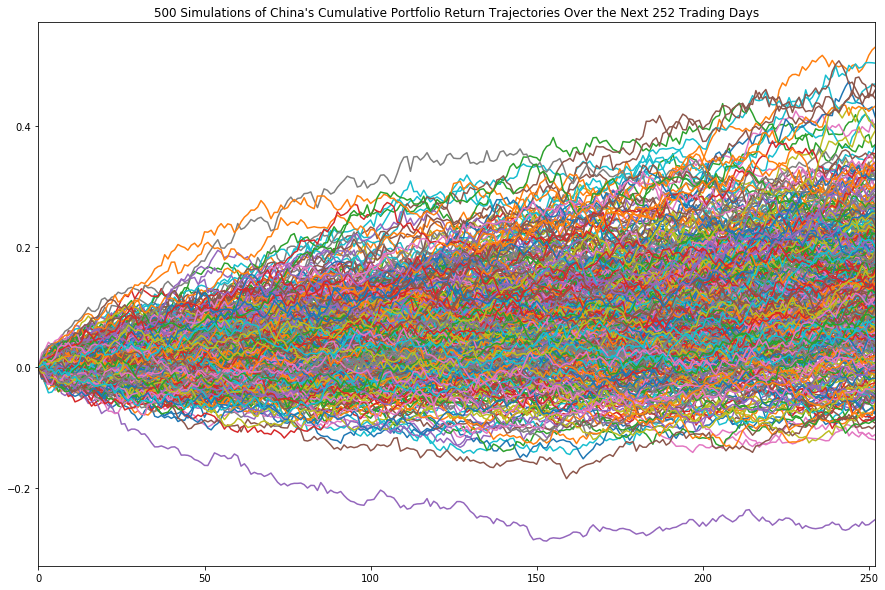

In [19]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of China's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))